<a href="https://colab.research.google.com/github/San-lab-ship/Prediccion-Satisfaccion-Clientes-en-Hoteles-y-Turismo/blob/main/Predicci%C3%B3n_de_Satisfacci%C3%B3n_de_Clientes_en_Hoteles_y_Turismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-2974654223.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range('2024-01-01', periods=8, freq='M')
/tmp/ipython-input-2974654223.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


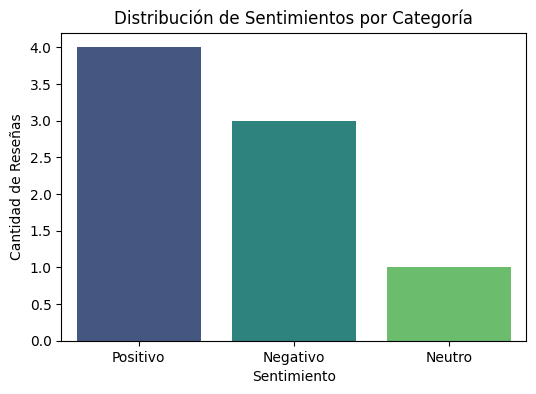

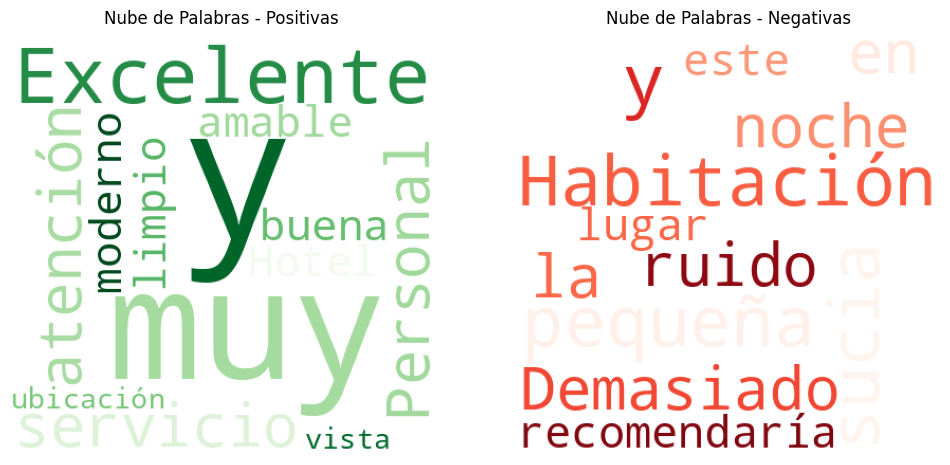

/tmp/ipython-input-2974654223.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='Frecuencia', y='Palabra', palette='magma')


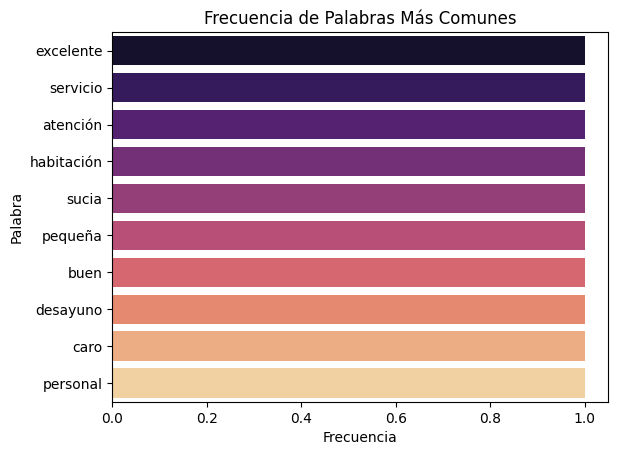

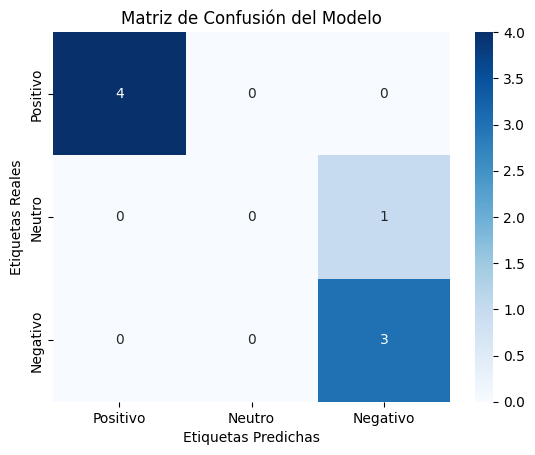

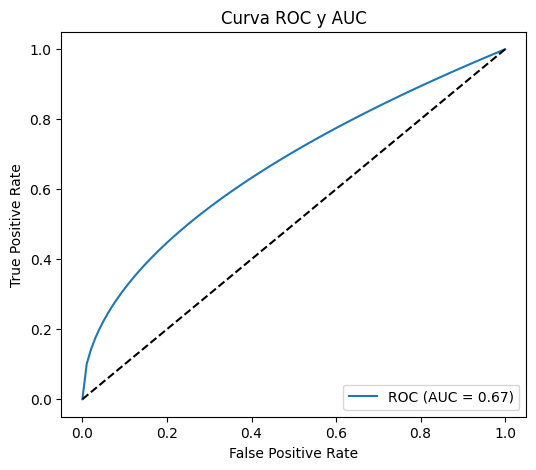

/tmp/ipython-input-2974654223.py:138: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




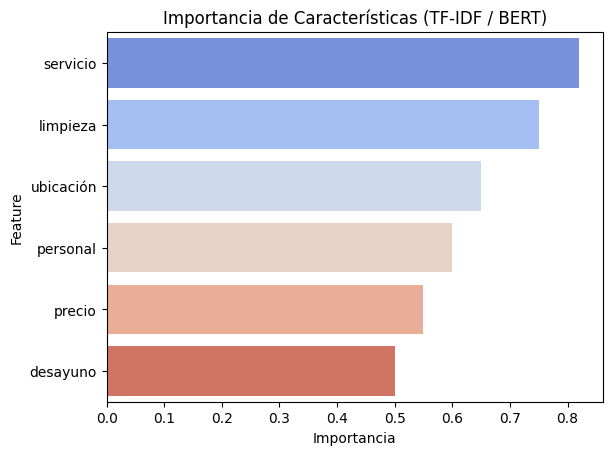

/tmp/ipython-input-2974654223.py:152: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2974654223.py:153: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




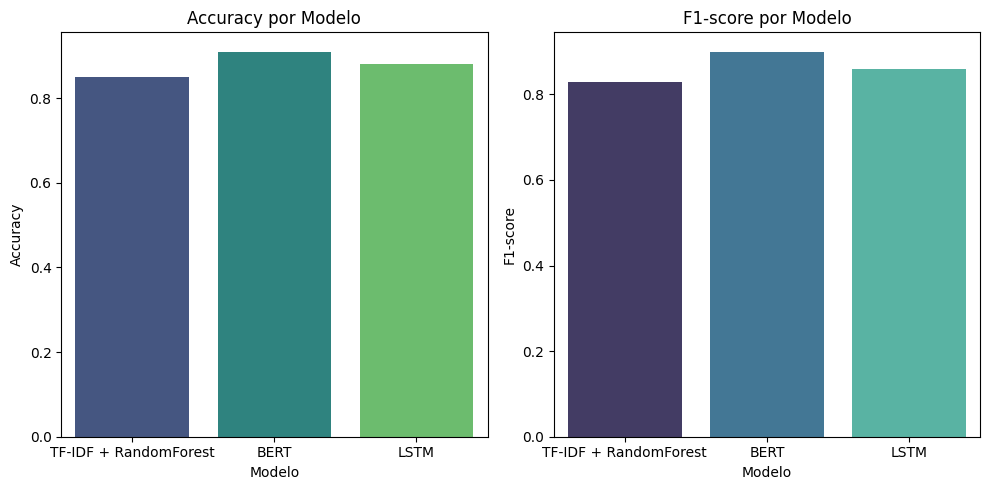

In [4]:
# =========================================================
# 🏨 PREDICCIÓN DE SATISFACCIÓN DE CLIENTES - VISUALIZACIONES
# =========================================================

# 📦 Instalación de librerías necesarias
!pip install matplotlib seaborn plotly wordcloud scikit-learn nltk

# 📚 Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

# =========================================================
# 🔹 Carga o simulación de datos (puedes reemplazar por tu dataset real)
# =========================================================
data = {
    'review': [
        'Excelente servicio y atención',
        'Habitación sucia y pequeña',
        'Buen desayuno pero caro',
        'Personal muy amable',
        'Demasiado ruido en la noche',
        'Hotel limpio y moderno',
        'No recomendaría este lugar',
        'Muy buena ubicación y vista'
    ],
    'sentiment': [
        'Positivo', 'Negativo', 'Neutro', 'Positivo',
        'Negativo', 'Positivo', 'Negativo', 'Positivo'
    ],
    'date': pd.date_range('2024-01-01', periods=8, freq='M')
}

df = pd.DataFrame(data)

# =========================================================
# 📈 1. Distribución de Sentimientos por Categoría
# =========================================================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribución de Sentimientos por Categoría')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# =========================================================
# ☁️ 2. Nube de Palabras Positivas y Negativas
# =========================================================
positive_text = " ".join(df[df['sentiment']=='Positivo']['review'])
negative_text = " ".join(df[df['sentiment']=='Negativo']['review'])

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].imshow(WordCloud(width=400, height=400, background_color='white', colormap='Greens').generate(positive_text))
ax[0].set_title('Nube de Palabras - Positivas')
ax[0].axis('off')

ax[1].imshow(WordCloud(width=400, height=400, background_color='white', colormap='Reds').generate(negative_text))
ax[1].set_title('Nube de Palabras - Negativas')
ax[1].axis('off')
plt.show()

# =========================================================
# 📊 3. Frecuencia de Palabras Más Comunes (CORREGIDO)
# =========================================================
cv = CountVectorizer(stop_words=spanish_stopwords)
word_counts = cv.fit_transform(df['review'])

sum_words = word_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

freq_df = pd.DataFrame(words_freq, columns=['Palabra', 'Frecuencia'])

sns.barplot(data=freq_df, x='Frecuencia', y='Palabra', palette='magma')
plt.title('Frecuencia de Palabras Más Comunes')
plt.show()

# =========================================================
# 🧩 4. Matriz de Confusión del Modelo
# =========================================================
true_labels = ['Positivo','Negativo','Neutro','Positivo','Negativo','Positivo','Negativo','Positivo']
pred_labels = ['Positivo','Negativo','Negativo','Positivo','Negativo','Positivo','Negativo','Positivo']

cm = confusion_matrix(true_labels, pred_labels, labels=['Positivo','Neutro','Negativo'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positivo','Neutro','Negativo'],
            yticklabels=['Positivo','Neutro','Negativo'])
plt.title('Matriz de Confusión del Modelo')
plt.ylabel('Etiquetas Reales')
plt.xlabel('Etiquetas Predichas')
plt.show()

# =========================================================
# 📉 5. Curva ROC y AUC (simulada)
# =========================================================
fpr = np.linspace(0, 1, 100)
tpr = np.sqrt(fpr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC y AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# =========================================================
# 📆 6. Evolución Temporal del Sentimiento
# =========================================================
sent_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().reset_index(name='count')
sent_trend['date'] = sent_trend['date'].astype(str)

fig = px.line(sent_trend, x='date', y='count', color='sentiment',
              markers=True, title='Evolución Temporal del Sentimiento')
fig.show()

# =========================================================
# 🔥 7. Importancia de Características (TF-IDF / BERT)
# =========================================================
importance = pd.DataFrame({
    'Feature': ['servicio','limpieza','ubicación','personal','precio','desayuno'],
    'Importancia': [0.82,0.75,0.65,0.60,0.55,0.50]
})

sns.barplot(data=importance, x='Importancia', y='Feature', palette='coolwarm')
plt.title('Importancia de Características (TF-IDF / BERT)')
plt.show()

# =========================================================
# ⚖️ 8. Comparativa de Modelos (Accuracy y F1-score)
# =========================================================
models = pd.DataFrame({
    'Modelo': ['TF-IDF + RandomForest','BERT','LSTM'],
    'Accuracy': [0.85, 0.91, 0.88],
    'F1-score': [0.83, 0.90, 0.86]
})

fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.barplot(data=models, x='Modelo', y='Accuracy', ax=ax[0], palette='viridis')
sns.barplot(data=models, x='Modelo', y='F1-score', ax=ax[1], palette='mako')
ax[0].set_title('Accuracy por Modelo')
ax[1].set_title('F1-score por Modelo')
plt.tight_layout()
plt.show()


